In [ ]:
pip uninstall tensorflow

In [ ]:
pip install --user tensorflow==1.15

In [1]:
import glob
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.python.keras import losses, layers, models
from tensorflow.python.keras import backend as K

## 1. Формирование структуры данных

Нужно получить данные и маски

In [ ]:
data_dir = '../weights/'
os.listdir(data_dir)

In [2]:
data_dir = '../data/'
os.listdir(data_dir)

['.ipynb_checkpoints',
 'ccs.ipynb',
 'image',
 'mask',
 'resize_image.ipynb',
 'resize_mask.ipynb']

Нужно получить лист с путями к файлу.

In [3]:
# match the image with its corresponding mask image
image_lst = []
mask_lst = []

In [4]:
imres = './image/resized'
for d, dirs, files in os.walk(imres):
    #print
    #print(imres  + str(files))
    for file in files:
        fil = data_dir + imres[2:] + '/' + file
        image_lst.append(fil)
        print(fil)
        #print(dirs)

../data/image/resized/resizedimage_10066.jpg
../data/image/resized/resizedimage_10098.jpg
../data/image/resized/resizedimage_1013.jpg
../data/image/resized/resizedimage_10171.jpg
../data/image/resized/resizedimage_10272.jpg
../data/image/resized/resizedimage_10288.jpg
../data/image/resized/resizedimage_10294.jpg
../data/image/resized/resizedimage_10296.jpg
../data/image/resized/resizedimage_10325.jpg
../data/image/resized/resizedimage_1037.jpg
../data/image/resized/resizedimage_1039.jpg
../data/image/resized/resizedimage_1081.jpg
../data/image/resized/resizedimage_10869.jpg
../data/image/resized/resizedimage_10924.jpg
../data/image/resized/resizedimage_11151.jpg
../data/image/resized/resizedimage_11178.jpg
../data/image/resized/resizedimage_11206.jpg
../data/image/resized/resizedimage_11223.jpg
../data/image/resized/resizedimage_11249.jpg
../data/image/resized/resizedimage_11282.jpg
../data/image/resized/resizedimage_11360.jpg
../data/image/resized/resizedimage_11490.jpg
../data/image/

In [5]:
image_lst[0]

'../data/image/resized/resizedimage_10066.jpg'

In [6]:
mkres = './mask/resized'
for d, dirs, files in os.walk(mkres):
    #print
    #print(imres  + str(files))
    for file in files:
        fil = data_dir + mkres[2:] + '/' + file
        mask_lst.append(fil)
        print(fil)
        #print(dirs)

../data/mask/resized/resizedmask_10066.png
../data/mask/resized/resizedmask_10098.png
../data/mask/resized/resizedmask_1013.png
../data/mask/resized/resizedmask_10171.png
../data/mask/resized/resizedmask_10272.png
../data/mask/resized/resizedmask_10288.png
../data/mask/resized/resizedmask_10294.png
../data/mask/resized/resizedmask_10296.png
../data/mask/resized/resizedmask_10325.png
../data/mask/resized/resizedmask_1037.png
../data/mask/resized/resizedmask_1039.png
../data/mask/resized/resizedmask_1081.png
../data/mask/resized/resizedmask_10869.png
../data/mask/resized/resizedmask_10924.png
../data/mask/resized/resizedmask_11151.png
../data/mask/resized/resizedmask_11178.png
../data/mask/resized/resizedmask_11206.png
../data/mask/resized/resizedmask_11223.png
../data/mask/resized/resizedmask_11249.png
../data/mask/resized/resizedmask_11282.png
../data/mask/resized/resizedmask_11360.png
../data/mask/resized/resizedmask_11490.png
../data/mask/resized/resizedmask_11492.png
../data/mask/re

In [7]:
mask_lst[0]

'../data/mask/resized/resizedmask_10066.png'

In [ ]:
#for d, dirs, files in os.walk('./mask/resized'):
#    print(files)
#    print(dirs)

In [8]:
print(len(image_lst))
print(len(mask_lst))

245
245


## 2. Подготовка данных (предобработка)

In [9]:
# split data into train and validation set
from sklearn.model_selection import train_test_split

In [10]:
img_train,img_valid,label_train,label_valid = \
train_test_split(image_lst, mask_lst, test_size = 0.2, random_state=5)

In [11]:
# verify the splitting results
print(len(img_train))
print(len(label_train))
print(len(img_valid))
print(len(label_valid))

196
196
49
49


In [12]:
# store the size of dataset for later use
num_train = len(img_train)
num_valid = len(img_valid)

In [13]:
# conduct some visualization for data check
import matplotlib.image as mpimg
from PIL import Image

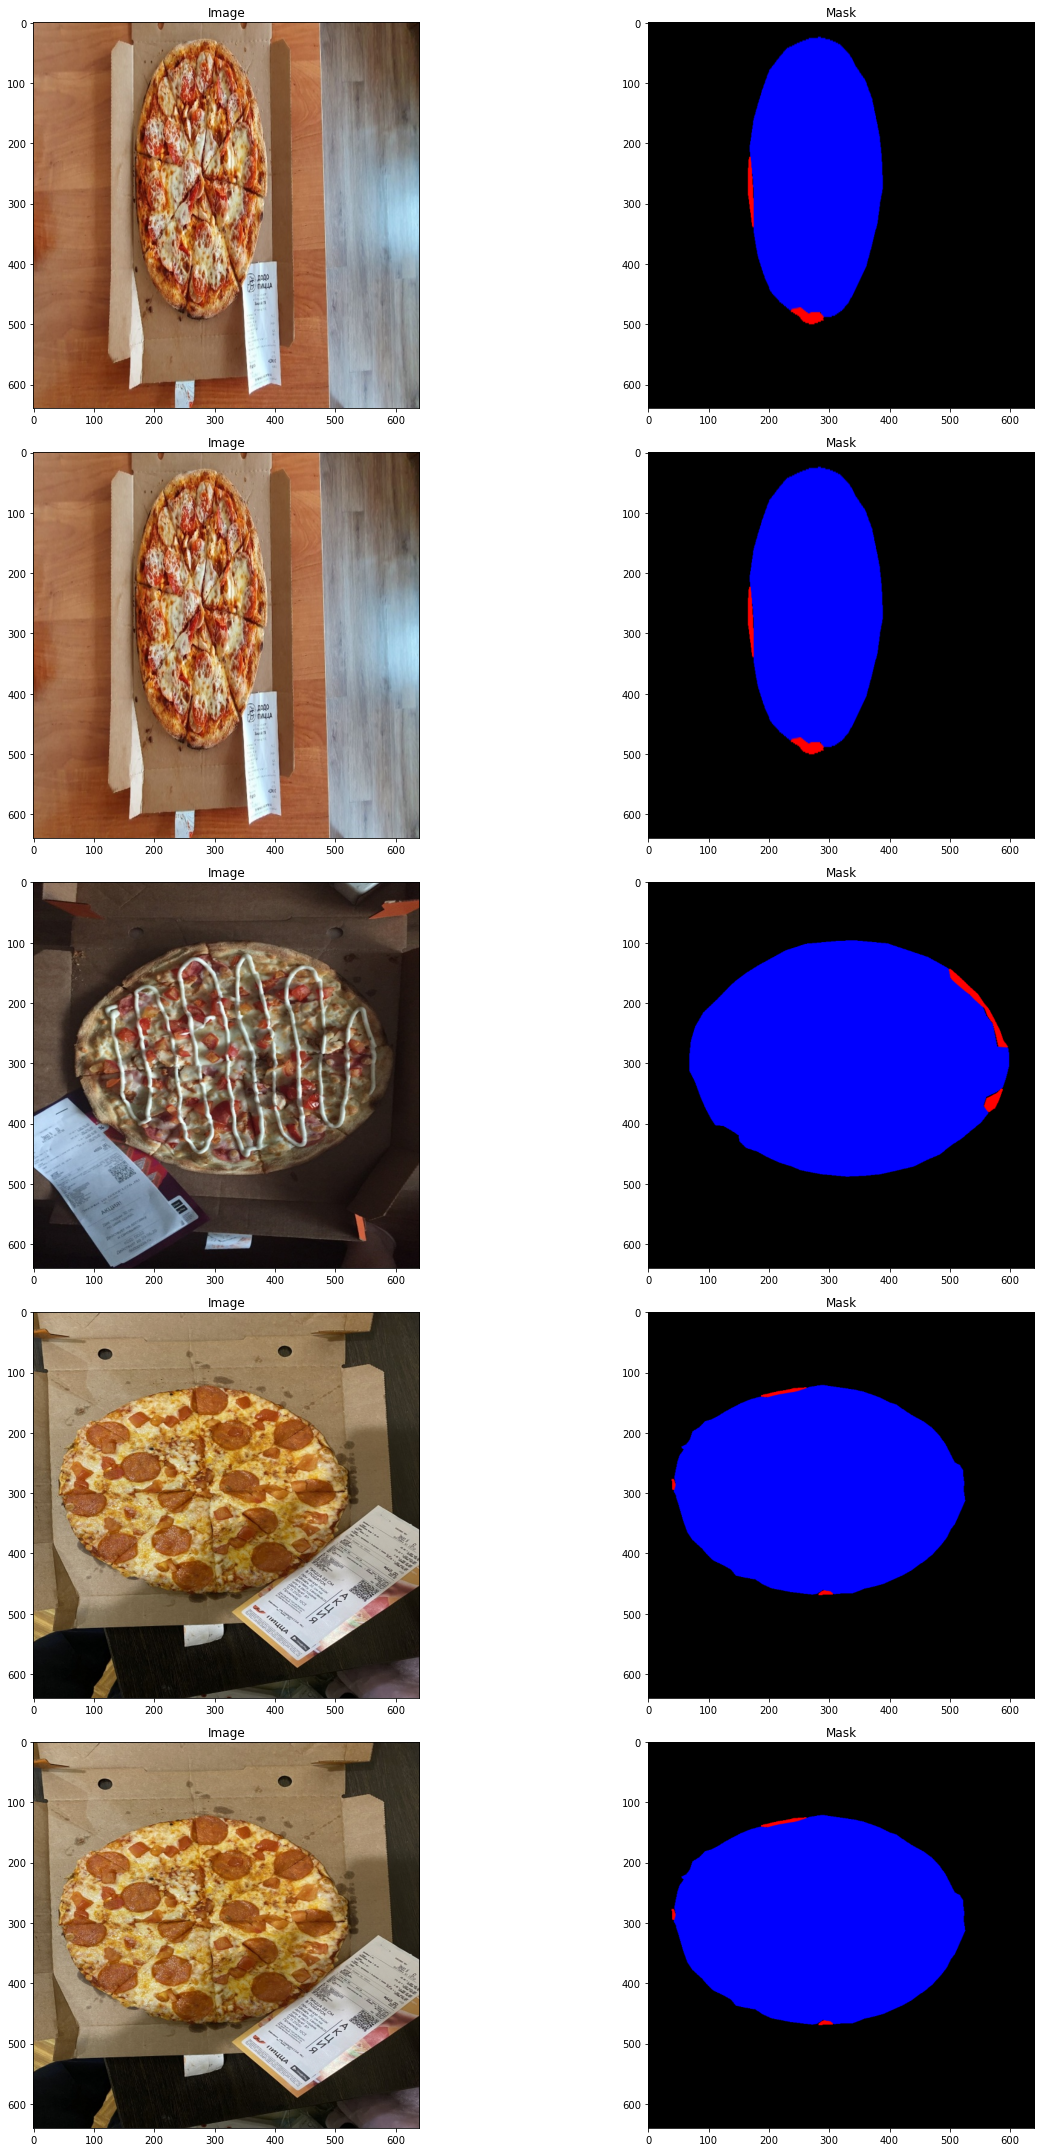

In [14]:
show_img_num = 5
rand_show = np.random.choice(num_train, show_img_num)

plt.figure(figsize=(20,30))
for i in range(0, show_img_num * 2, 2):
    num = rand_show[i // 3]
    x = img_train[num]
    y = label_train[num]
    
    img = mpimg.imread(x)
    plt.subplot(show_img_num, 2, i+1)
    plt.imshow(img)
    plt.title("Image")
    
    label = Image.open(y)
    plt.subplot(show_img_num, 2, i+2)
    plt.imshow(label)
    plt.title("Mask")

plt.tight_layout()
plt.show()

In [15]:
# setup some model parameters
image_shape = (256,256,3)
bs = 3

[[SOLVED] TensorFlow: AttributeError: module ‘tensorflow’ has no attribute ‘read_file’](https://better-coding.com/solved-tensorflow-attributeerror-module-tensorflow-has-no-attribute-read_file/)

In [16]:
# build data pipeline
def read_data_from_file(fname, label):
    # read the output contents of this file
    img_file = tf.io.read_file(fname)                   # tf => tf.io
    # convert jpeg image into a uint8 tensor
    img = tf.image.decode_jpeg(img_file)
    
    label_file = tf.io.read_file(label)                 # tf => tf.io 
    # also convert image to tensor
    # gif images return as (num_frames, h, w, c)
    label_img = tf.image.decode_gif(label_file)[0]
    
    # The label image should only have values of 1 or 0, indicating pixel wise
    # object (car) or not (background). We take the first channel only.
    label_img = label_img[:,:,0]
    # after retrieve a band from mask, expand its dimension to transform it 
    # back to 3D from 2D
    label_img = tf.expand_dims(label_img, axis=-1)
    return img, label_img

[How to update tensorflow to support tf.contrib?](https://stackoverflow.com/questions/38386824/how-to-update-tensorflow-to-support-tf-contrib)

In [ ]:
!pip install tensorflow==1.15

In [17]:
# need some operations
import tensorflow.contrib as tfcontrib

[AttributeError: module 'tensorflow_core._api.v2.image' has no attribute 'resize_images'](https://stackoverflow.com/questions/60948568/attributeerror-module-tensorflow-core-api-v2-image-has-no-attribute-resize)

In [18]:
# define data augmentation

# shift image
def shift_image(output_img, label_img, width_shift_range, height_shift_range):
    ''' performs horizontal shift or vertical shift '''
    if width_shift_range:
        # perform horizontal shift (get random value from uniform distribution)
        # randomly generates a value after applied shift range
        width_shift_range = tf.random.uniform([],
                                              -width_shift_range * image_shape[1],
                                              width_shift_range * image_shape[1])
        
    if height_shift_range:
        # perform vertical shift (get random value from uniform distribution)
        height_shift_range = tf.random.uniform([],
                                               -height_shift_range * image_shape[0],
                                               height_shift_range * image_shape[0])
    
    # translate image - apply on both image and mask
    # translate the image by a given vector, appied two
    # shift amount on the image
    output_img = tfcontrib.image.translate(output_img,
                                           [width_shift_range, height_shift_range])
    label_img = tfcontrib.image.translate(label_img,
                                          [width_shift_range, height_shift_range])
    return output_img, label_img

# do some horizontal flip
def flip_img(horizontal_flip, tr_img, label_img):
    if horizontal_flip:
        # get random value as flip prob
        # this condition will return false if flip_prob < 0.5 
        # and it means not doing flip, otherwise, flip both img and label
        flip_prob = tf.random.uniform([], 0.0, 1.0)        # rand_un => rand.un
        tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                    lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)),
                                    lambda: (tr_img, label_img))
    return tr_img, label_img

# do data augmentation
def _augment(img, label_img, resize=None, scale=1, 
             hue_delta=0,horizontal_flip=False,
             width_shift_range=0,height_shift_range=0):
    # resize image
    if resize is not None:
        img = tf.image.resize(img, resize)                          # resize_images ->  resize
        label_img = tf.image.resize(label_img, resize)              # resize_images ->  resize   
        
    if hue_delta:
        img = tf.image.random_hue(img, hue_delta)
        
    # do flip and shift
    img, label_img = flip_img(horizontal_flip, img, label_img)
    img, label_img = shift_image(img, label_img, 
                                 width_shift_range, 
                                 height_shift_range)
    label_img = tf.to_float(label_img) * scale
    img = tf.to_float(img) * scale
    return img, label_img

## 3. Генерируем датасет
       после определения функций обработки данных мы можем создать
       объект набора данных, а затем использовать метод map для создания нового
       набор данных

In [19]:
import functools

In [20]:
# 3 steps
# 1. define a dataset object read the filename and label
# 2. apply process function to convert filename to float tensor
# 3. apply process function to do data augmentation

# define dataset
def get_dataset(filenames, labels,
                preproc_fn=functools.partial(_augment),
                threads=5,
                batch_size=bs,
                shuffle=True):
    num_x = len(filenames)
    # create a dataset from the filenames and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    # map out preprocessing function to every element in our dataset,
    #taking advantage of multithreading
    # this mapping will convert image from filename to float tensor
    # and scale it down
    dataset = dataset.map(read_data_from_file, num_parallel_calls=threads)
    if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
        assert batch_size == 1, "Batching images must be of the same size"
    
    # apply data augmentation
    dataset = dataset.map(preproc_fn, num_parallel_calls=threads)
    
    if shuffle:
        dataset = dataset.shuffle(num_x)
    
    # repeat our dataset for every epoch, move iterator back to
    # the top of dataset?
    dataset = dataset.repeat().batch(bs)
    return dataset

In [21]:
# generating dataset

# define augments dictionary
tr_cfg = {
    'resize': [image_shape[0], image_shape[1]],
    'scale': 1/255.,
    'hue_delta':0.1,
    'horizontal_flip':True,
    'width_shift_range':0.1,
    'height_shift_range':0.1
}

val_cfg = {
    'resize': [image_shape[0], image_shape[1]],
    'scale': 1/255.,
}

tr_preprocessing_fn = functools.partial(_augment, **tr_cfg)
val_preprocessing_fn = functools.partial(_augment, **val_cfg)

In [22]:
train_ds = get_dataset(img_train, label_train,
                       preproc_fn=tr_preprocessing_fn,
                       batch_size=bs)

val_ds = get_dataset(img_valid, label_valid,
                     preproc_fn=val_preprocessing_fn,
                     batch_size=bs)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


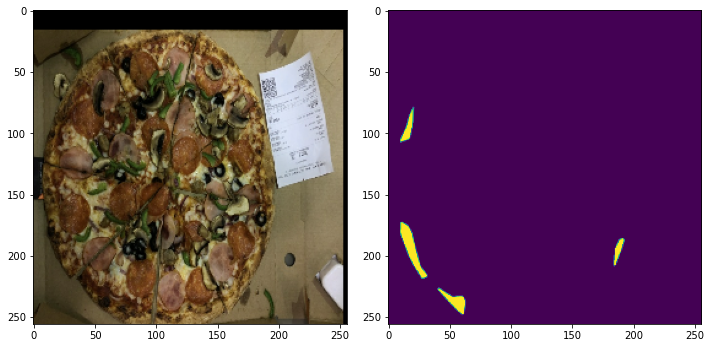

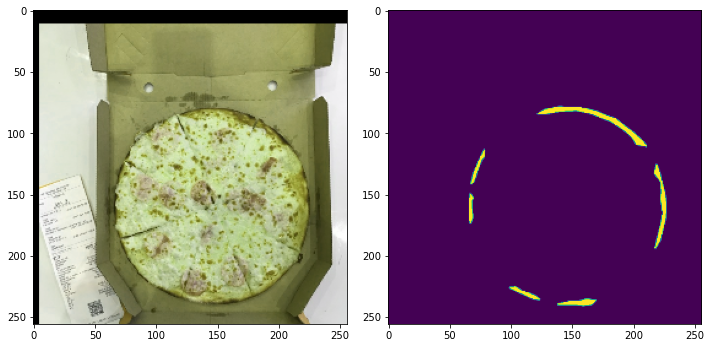

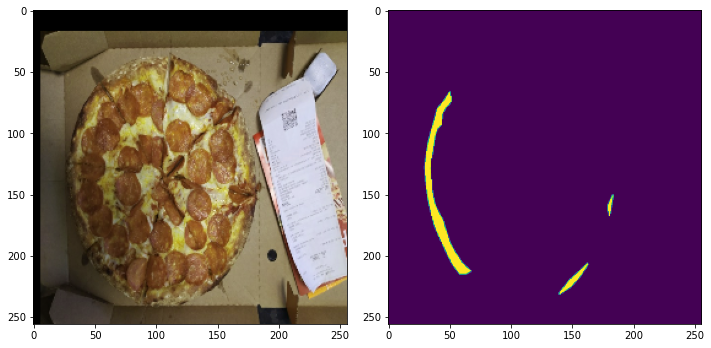

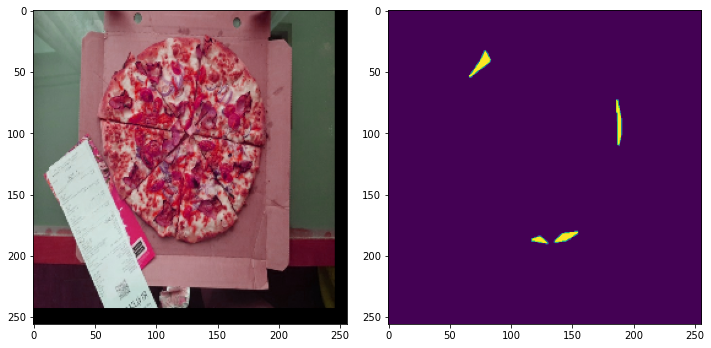

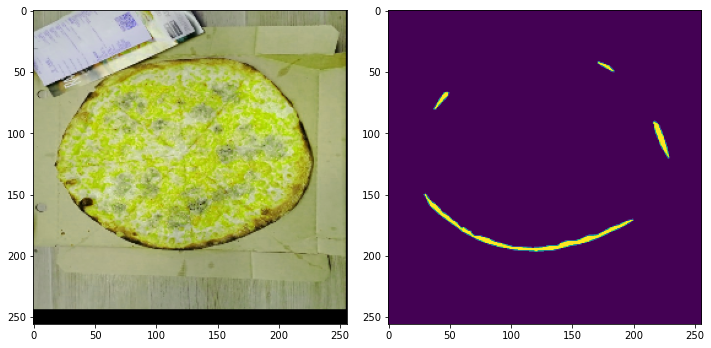

In [23]:
# generate a temporary dataset for visualization
temp_ds = get_dataset(img_train, label_train,
                       preproc_fn=tr_preprocessing_fn,
                       batch_size=show_img_num,
                       shuffle=False)

# define an iterator to access the dataset
data_aug_iter = temp_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

# define a session to execute operation
with tf.Session() as sess:
    for i in range(show_img_num):
        plt.figure(figsize=(10,15))
        
        batch_of_imgs, label = sess.run(next_element)
        img = batch_of_imgs[0]
        
        plt.subplot(1,2,1)
        plt.imshow(img)
        
        plt.subplot(1,2,2)
        plt.imshow(label[0,:,:,0])
        plt.tight_layout()
        plt.show()

## 4. Определение архитектуры модели - U-Net

In [24]:
# define convolutional layer block
def conv_block(input_tensor, num_filters):
    encoder = layers.Conv2D(num_filters, (3,3), padding='same')(input_tensor)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    
    encoder = layers.Conv2D(num_filters, (3,3), padding='same')(encoder)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    return encoder

# define encoder part
def encoder_block(input_tensor, num_filters):
    encoder = conv_block(input_tensor, num_filters)
    # reduce the spatial size by half
    encoder_pool = layers.MaxPooling2D((2,2), strides=(2,2))(encoder)
    # convenience for concatinating
    return encoder_pool, encoder

# define decoder part
def decoder_block(input_tensor, concate_tensor, num_filters):
    decoder = layers.Conv2DTranspose(num_filters, (2,2), strides=(2,2), padding='same')(input_tensor)
    decoder = layers.concatenate([concate_tensor, decoder], axis=-1)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    
    decoder = layers.Conv2D(num_filters, (3,3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    
    decoder = layers.Conv2D(num_filters, (3,3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    
    return decoder

In [25]:
# construct network

# create an instance of keras tensor
inputs = layers.Input(shape=image_shape)
encoder0_pool, encoder0 = encoder_block(inputs, 32)
encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64)
encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128)
encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256)
encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)

mid = conv_block(encoder4_pool, 1024)

decoder4 = decoder_block(mid, encoder4, 512)
decoder3 = decoder_block(decoder4, encoder3, 256)
decoder2 = decoder_block(decoder3, encoder2, 128)
decoder1 = decoder_block(decoder2, encoder1, 64)
decoder0 = decoder_block(decoder1, encoder0, 32)

# do 1 * 1 convolution over depth, and create a mask
# that is the same size as the input image
outputs = layers.Conv2D(1, (1,1), activation='sigmoid')(decoder0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [26]:
# define the model
model = models.Model(inputs=inputs, outputs=outputs)

In [27]:
# overview the model architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

## 5. Определяем Loss Function and Metrics
    1. dice coefficient - measure the overlap - we want to maximize it
    2. dice loss - it is 1 minus dice coefficient - by maximize dice
       coefficient, we can minimize the dice loss
    3. binary crossentropy + dice loss

In [28]:
# define loss function and metrics

def dice_coefficient(y_true, y_pred):
    smooth = 1.
    # flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coefficient(y_true, y_pred)
    return loss

def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

## 6. Тренируем модель

In [29]:
# compile the model
# loss -> model to minimize
# metrics -> for model doing evaluation in training and testing
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_loss])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
save_model_weight = '../weights/batchnorm_weights.hdf5'
epochs = 30

In [31]:
# training the model

EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_dice_loss',
                                             mode='min',
                                             patience=10,
                                             verbose=1)

LRAnnealing = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_dice_loss',
                                                   factor=0.2,
                                                   mode='min',
                                                   patience=5,
                                                   verbose=1)

Checkpoint = tf.keras.callbacks.ModelCheckpoint(save_model_weight,
                                                monitor='val_dice_loss',
                                                verbose=1,
                                                save_best_only=True)

cp = [EarlyStop, LRAnnealing, Checkpoint]


history = model.fit(train_ds,
                   steps_per_epoch=int(np.ceil(num_train / float(bs))),
                   epochs=epochs,
                   validation_data = val_ds,
                   validation_steps=int(np.ceil(num_valid / float(bs))),
                   callbacks=cp)


Train on 66 steps, validate on 17 steps
Epoch 1/30
65/66 [============================>.] - ETA: 4s - loss: 1.2468 - dice_loss: 0.9670
Epoch 00001: val_dice_loss improved from inf to 0.97043, saving model to ../weights/batchnorm_weights.hdf5
66/66 [==============================] - 349s 5s/step - loss: 1.2450 - dice_loss: 0.9673 - val_loss: 5.2134 - val_dice_loss: 0.9704
Epoch 2/30
65/66 [============================>.] - ETA: 4s - loss: 1.0797 - dice_loss: 0.9469
Epoch 00002: val_dice_loss did not improve from 0.97043
66/66 [==============================] - 333s 5s/step - loss: 1.0790 - dice_loss: 0.9466 - val_loss: 1.1435 - val_dice_loss: 0.9737
Epoch 3/30
65/66 [============================>.] - ETA: 4s - loss: 0.9984 - dice_loss: 0.8993
Epoch 00003: val_dice_loss improved from 0.97043 to 0.96488, saving model to ../weights/batchnorm_weights.hdf5
66/66 [==============================] - 336s 5s/step - loss: 0.9972 - dice_loss: 0.8982 - val_loss: 1.1840 - val_dice_loss: 0.9649
Epoch

Epoch 27/30
65/66 [============================>.] - ETA: 4s - loss: 0.4845 - dice_loss: 0.4407
Epoch 00027: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 00027: val_dice_loss did not improve from 0.42860
66/66 [==============================] - 334s 5s/step - loss: 0.4816 - dice_loss: 0.4382 - val_loss: 0.4905 - val_dice_loss: 0.4435
Epoch 28/30
65/66 [============================>.] - ETA: 4s - loss: 0.4660 - dice_loss: 0.4208
Epoch 00028: val_dice_loss did not improve from 0.42860
66/66 [==============================] - 332s 5s/step - loss: 0.4658 - dice_loss: 0.4207 - val_loss: 0.4940 - val_dice_loss: 0.4462
Epoch 29/30
65/66 [============================>.] - ETA: 4s - loss: 0.4664 - dice_loss: 0.4234
Epoch 00029: val_dice_loss did not improve from 0.42860
66/66 [==============================] - 331s 5s/step - loss: 0.4657 - dice_loss: 0.4231 - val_loss: 0.4917 - val_dice_loss: 0.4437
Epoch 30/30
65/66 [============================>.] - ETA: 4s - los

## 7. Визуализируем несколько предсказаний на валидационном датасете

In [32]:
model = models.load_model(save_model_weight, custom_objects={'bce_dice_loss': bce_dice_loss,
                                                           'dice_loss': dice_loss})

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


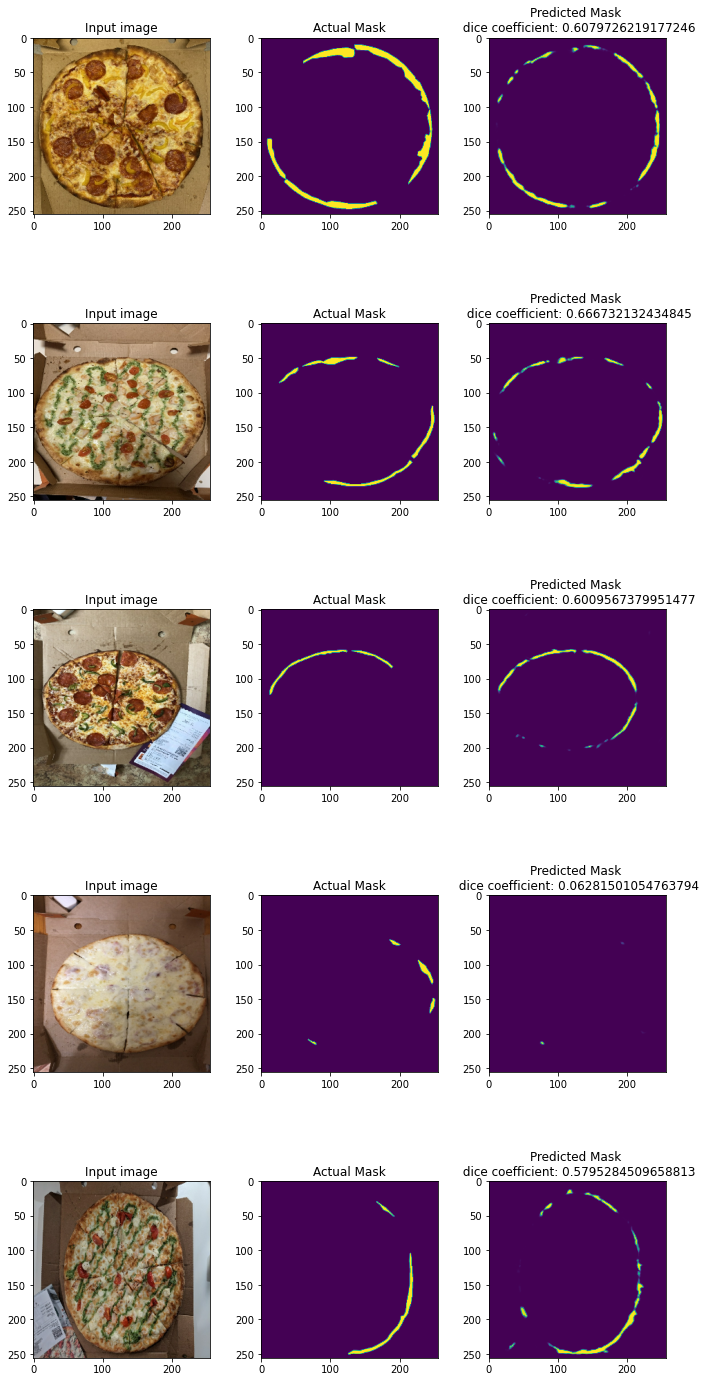

In [33]:
# Let's visualize some of the outputs 
data_aug_iter = val_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

dice_coe_col = []
# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 20))
for i in range(5):
    batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
    img = batch_of_imgs[0]
    predicted_label = model.predict(batch_of_imgs)[0]
    dice_coe = dice_coefficient(label[0,:,:,0], predicted_label[:,:,0]).eval(session=tf.keras.backend.get_session())
    dice_coe_col.append(dice_coe)
    
    plt.subplot(5, 3, 3 * i + 1)
    plt.imshow(img)
    plt.title("Input image")

    plt.subplot(5, 3, 3 * i + 2)
    plt.imshow(label[0, :, :, 0])
    plt.title("Actual Mask")
    plt.subplot(5, 3, 3 * i + 3)
    plt.imshow(predicted_label[:, :, 0])
    plt.title("Predicted Mask \n dice coefficient: {}".format(dice_coe,4))
plt.tight_layout()
plt.show()

In [34]:
dice_coe_col = np.array(dice_coe_col)
avg_dice_coe = np.average(dice_coe_col)
print("average dice coefficient: {}".format(avg_dice_coe))

average dice coefficient: 0.5036009550094604
